# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# Build query URL
number = 1
set_1 = 1
city_name = []
lat = []
lng = []
temp = []
humid = []
cloud = []
wind = []
country = []
dt = []
for city in cities:
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + city +"&units=imperial"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_name.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        temp.append(weather_json['main']['temp_max'])
        humid.append(weather_json['main']['humidity'])
        wind.append(weather_json['wind']['speed'])        
        cloud.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        dt.append(weather_json['dt'])
        print(f"Processing Record {number} of Set{set_1} | {city}")
        number = number + 1
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    
    if (number == 51) & (set_1 == 1):
        number = 0
        set_1 = set_1+1
    elif (number == 50) & (set_1 >1):
        number = 0
        set_1 = set_1+1

        

            
    

Processing Record 1 of Set1 | sitka
Processing Record 2 of Set1 | nerchinskiy zavod
Processing Record 3 of Set1 | atuona
Processing Record 4 of Set1 | laguna
Processing Record 5 of Set1 | butler
Processing Record 6 of Set1 | jamestown
Processing Record 7 of Set1 | portland
Processing Record 8 of Set1 | morondava
Processing Record 9 of Set1 | oxford
Processing Record 10 of Set1 | verkhoyansk
Processing Record 11 of Set1 | rikitea
Processing Record 12 of Set1 | punta arenas
Processing Record 13 of Set1 | tiksi
Processing Record 14 of Set1 | hobart
Processing Record 15 of Set1 | bengkulu
Processing Record 16 of Set1 | guerrero negro
Processing Record 17 of Set1 | ler
Processing Record 18 of Set1 | husavik
Processing Record 19 of Set1 | coquimbo
Processing Record 20 of Set1 | ancud
Processing Record 21 of Set1 | aklavik
Processing Record 22 of Set1 | saint-philippe
Processing Record 23 of Set1 | isla vista
Processing Record 24 of Set1 | naze
Processing Record 25 of Set1 | upernavik
Process

City not found. Skipping...
Processing Record 40 of Set4 | chioggia
Processing Record 41 of Set4 | milkovo
Processing Record 42 of Set4 | sinnamary
Processing Record 43 of Set4 | kieta
Processing Record 44 of Set4 | smoky lake
Processing Record 45 of Set4 | severo-kurilsk
Processing Record 46 of Set4 | chokwe
City not found. Skipping...
Processing Record 47 of Set4 | hami
Processing Record 48 of Set4 | marawi
Processing Record 49 of Set4 | kendari
Processing Record 0 of Set5 | lamu
Processing Record 1 of Set5 | cabra
Processing Record 2 of Set5 | turiacu
City not found. Skipping...
Processing Record 3 of Set5 | seymchan
Processing Record 4 of Set5 | araouane
City not found. Skipping...
Processing Record 5 of Set5 | gejiu
Processing Record 6 of Set5 | ribeira grande
City not found. Skipping...
Processing Record 7 of Set5 | constitucion
Processing Record 8 of Set5 | kavaratti
Processing Record 9 of Set5 | kailua
Processing Record 10 of Set5 | chieti
Processing Record 11 of Set5 | praia
P

Processing Record 30 of Set8 | yakeshi
Processing Record 31 of Set8 | tongliao
Processing Record 32 of Set8 | xichang
Processing Record 33 of Set8 | qidong
Processing Record 34 of Set8 | kahului
Processing Record 35 of Set8 | ahipara
Processing Record 36 of Set8 | laramie
Processing Record 37 of Set8 | padang
Processing Record 38 of Set8 | jumla
Processing Record 39 of Set8 | dattapur
Processing Record 40 of Set8 | fort nelson
Processing Record 41 of Set8 | rabo de peixe
Processing Record 42 of Set8 | puri
Processing Record 43 of Set8 | anamoros
Processing Record 44 of Set8 | sept-iles
Processing Record 45 of Set8 | dwarka
Processing Record 46 of Set8 | robe
Processing Record 47 of Set8 | nanortalik
Processing Record 48 of Set8 | ruteng
Processing Record 49 of Set8 | soavinandriana
Processing Record 0 of Set9 | sidi ali
Processing Record 1 of Set9 | alta floresta
Processing Record 2 of Set9 | tilichiki
Processing Record 3 of Set9 | inongo
Processing Record 4 of Set9 | ratnagiri
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_df = pd.DataFrame({"City":city_name,
                            "lat": lat,
                            "lng": lng,
                            "temp": temp,
                            "humidity": humid,
                            "cloudiness": cloud,
                             "wind": wind,
                            "country": country,
                             "date":dt
                            })
city_data_df


,City,lat,lng,temp,humidity,cloudiness,wind,country,date
0,Sitka,57.05,-135.33,50.00,93,90,5.82,US,1593166611
1,Nerchinskiy Zavod,51.31,119.61,71.49,44,69,5.59,RU,1593166611
2,Atuona,-9.80,-139.03,79.74,79,28,15.37,PF,1593166611
3,Laguna,38.42,-121.42,68.00,64,5,3.36,US,1593166611
4,Butler,39.45,-84.57,68.00,100,20,4.52,US,1593166611
...,...,...,...,...,...,...,...,...,...
543,Melito di Porto Salvo,37.92,15.77,84.00,54,5,5.82,IT,1593166653
544,San Rafael,-34.62,-68.33,40.44,61,95,4.50,AR,1593166653
545,Brigantine,39.41,-74.36,70.00,88,40,6.20,US,1593166653
546,Baní,18.28,-70.33,79.00,88,44,3.00,DO,1593166653


In [9]:
city_data_df.count()
pd.DataFrame.to_csv(city_data_df, 'city_data.csv', index = False, header = True)

In [10]:
city_data_df

,City,lat,lng,temp,humidity,cloudiness,wind,country,date
0,Sitka,57.05,-135.33,50.00,93,90,5.82,US,1593166611
1,Nerchinskiy Zavod,51.31,119.61,71.49,44,69,5.59,RU,1593166611
2,Atuona,-9.80,-139.03,79.74,79,28,15.37,PF,1593166611
3,Laguna,38.42,-121.42,68.00,64,5,3.36,US,1593166611
4,Butler,39.45,-84.57,68.00,100,20,4.52,US,1593166611
...,...,...,...,...,...,...,...,...,...
543,Melito di Porto Salvo,37.92,15.77,84.00,54,5,5.82,IT,1593166653
544,San Rafael,-34.62,-68.33,40.44,61,95,4.50,AR,1593166653
545,Brigantine,39.41,-74.36,70.00,88,40,6.20,US,1593166653
546,Baní,18.28,-70.33,79.00,88,44,3.00,DO,1593166653


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
humidity_df = city_data_df[['City','humidity']]
humidity_df.set_index('City')
humidity_df = humidity_df.loc[(humidity_df["humidity"] > 100)]
humidity_df


,City,humidity


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

indexnames = city_data_df[city_data_df['humidity'] > 100].index
clean_city_data = city_data_df.drop(indexnames, inplace=False)


In [14]:
# Extract relevant fields from the data frame
clean_city_data
# Export the City_Data into a csv
pd.DataFrame.to_csv(clean_city_data, 'clean_city_data.csv', index = False, header = True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 0, 'latitude')

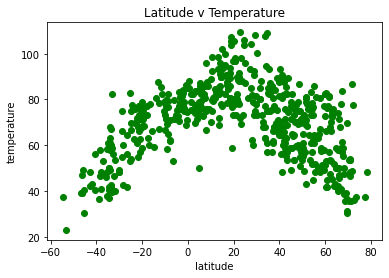

In [15]:
latvtemp = clean_city_data[["lat","temp"]]
lat =latvtemp["lat"]
temp = latvtemp["temp"]
plt.scatter(x=lat, y=temp, marker = "o", facecolor="green", edgecolors = "green")
plt.title("Latitude v Temperature")
plt.ylabel("temperature")
plt.xlabel("latitude")
#When the latitude gets closer to 0 it becomes hotter as it's closer to the equator.

## Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

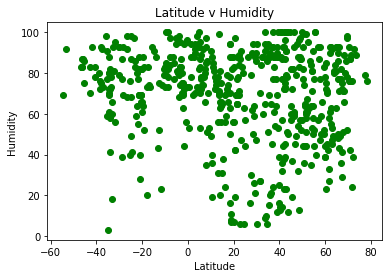

In [16]:
lathum = clean_city_data[["lat","humidity"]]
lat =lathum["lat"]
humid = lathum["humidity"]
plt.scatter(x=lat, y=humid, marker = "o", facecolor="green", edgecolors = "green")
plt.title("Latitude v Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
#Majority of ithe cities have higher humidity

## Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

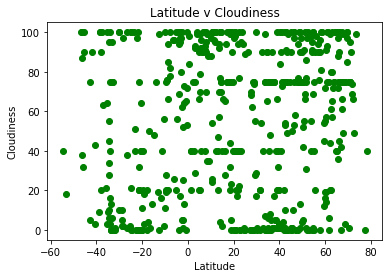

In [17]:
latcloud = clean_city_data[["lat","cloudiness"]]
lat =latcloud["lat"]
cloudiness = latcloud["cloudiness"]
plt.scatter(x=lat, y=cloudiness, marker = "o", facecolor="green", edgecolors = "green")
plt.title("Latitude v Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
#Thehre really isn't any correlation between latitude and cloudiness. 
#Potentially most of the data points are on either ends where it's 0 or it's closer to 100. Very few in between

## Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Latitude')

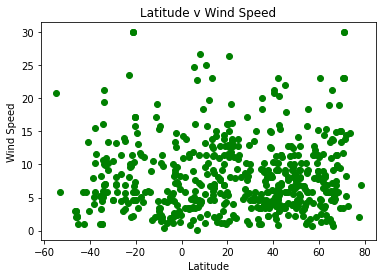

In [18]:
latwind = clean_city_data[["lat","wind"]]
lat =latwind["lat"]
wind = latwind["wind"]
plt.scatter(x=lat, y=wind, marker = "o", facecolor="green", edgecolors = "green")
plt.title("Latitude v Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
#Most of the cities regardless of latitude have low wind speed.

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [11]:
clean_city_data = pd.read_csv("clean_city_data.csv")

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = clean_city_data.loc[clean_city_data["lat"]>=0,:]
southern_hemisphere = clean_city_data.loc[clean_city_data["lat"]<0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.5x + 91.61
-0.64
0.41


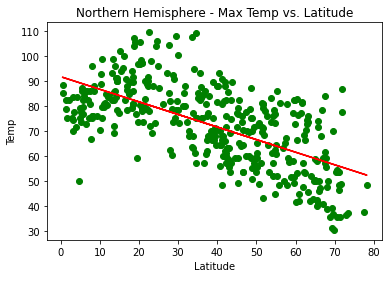

In [30]:
import scipy.stats as st
temp = northern_hemisphere["temp"]
lat = northern_hemisphere["lat"]
plt.scatter(x=lat, y=temp, marker = "o", facecolor="green", edgecolors = "green")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temp")
#get the slope, intercept, rvalue, pvalue, and standard error
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#get the correlation
correlation = round(st.pearsonr(lat,temp)[0],2)
r_sq= round(correlation**2,2)
print(f"{line_eq}")
print(f"{correlation}")
print(f"{r_sq}")
#Higher the latitude, the lower the temperature

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.84x + 82.18
0.8
0.64


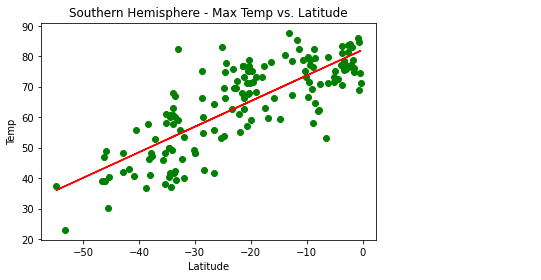

In [29]:
temp = southern_hemisphere["temp"]
lat = southern_hemisphere["lat"]
plt.scatter(x=lat, y=temp, marker = "o", facecolor="green", edgecolors = "green")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.ylabel("Temp")
plt.xlabel("Latitude")
#get the slope, intercept, rvalue, pvalue, and standard error
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#get the correlation
correlation = round(st.pearsonr(lat,temp)[0],2)
r_sq= round(correlation**2,2)
print(f"{line_eq}")
print(f"{correlation}")
print(f"{r_sq}")
#The higher the latitude, the higher the temperature it gets closer to the equator

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.01x + 67.4
-0.01
0.0


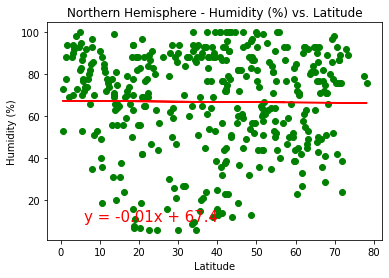

In [28]:
humidity = northern_hemisphere["humidity"]
lat = northern_hemisphere["lat"]
plt.scatter(x=lat, y=humidity, marker = "o", facecolor="green", edgecolors = "green")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
#get the slope, intercept, rvalue, pvalue, and standard error
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, humidity)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#get the correlation
correlation = round(st.pearsonr(lat, humidity)[0],2)
r_sq= round(correlation**2,2)
print(f"{line_eq}")
print(f"{correlation}")
print(f"{r_sq}")
#There's hardly any correlation between humidity and latitude based on the r^2 value for northern hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.09x + 77.48
0.07
0.0


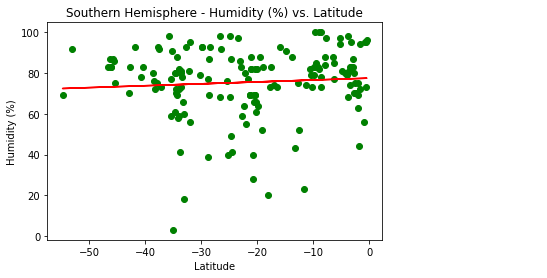

In [27]:
humidity = southern_hemisphere["humidity"]
lat = southern_hemisphere["lat"]
plt.scatter(x=lat, y=humidity, marker = "o", facecolor="green", edgecolors = "green")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
#get the slope, intercept, rvalue, pvalue, and standard error
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, humidity)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#get the correlation
correlation = round(st.pearsonr(lat, humidity)[0],2)
r_sq= round(correlation**2,2)
print(f"{line_eq}")
print(f"{correlation}")
print(f"{r_sq}")
#There's hardly any correlation between humidity and latitude based on the r^2 value for southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.02x + 57.68
-0.01
0.0


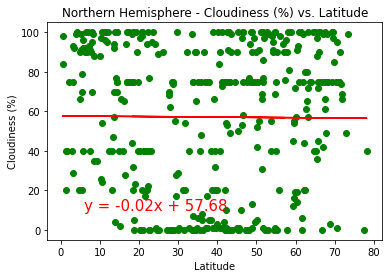

In [26]:
cloudiness = northern_hemisphere["cloudiness"]
lat = northern_hemisphere["lat"]
plt.scatter(x=lat, y=cloudiness, marker = "o", facecolor="green", edgecolors = "green")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
#get the slope, intercept, rvalue, pvalue, and standard error
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, cloudiness)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#get the correlation
correlation = round(st.pearsonr(lat, cloudiness)[0],2)
r_sq= round(correlation**2,2)
print(f"{line_eq}")
print(f"{correlation}")
print(f"{r_sq}")
#There's hardly any correlation between latitude and cloudiness based on the r^2 value for northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.23x + 50.13
0.08
0.01


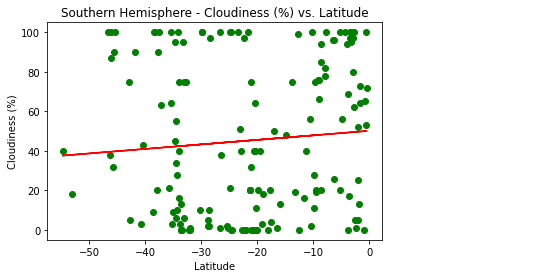

In [23]:
cloudiness = southern_hemisphere["cloudiness"]
lat = southern_hemisphere["lat"]
plt.scatter(x=lat, y=cloudiness, marker = "o", facecolor="green", edgecolors = "green")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
#get the slope, intercept, rvalue, pvalue, and standard error
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, cloudiness)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#get the correlation
correlation = round(st.pearsonr(lat, cloudiness)[0],2)
r_sq= round(correlation**2,2)
print(f"{line_eq}")
print(f"{correlation}")
print(f"{r_sq}")
#There's hardly any correlation between humidity and latitude based on the r^2 value for southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.01x + 8.2
0.03
0.0


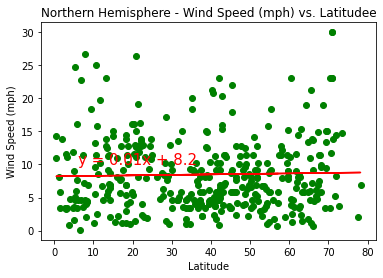

In [24]:
wind = northern_hemisphere["wind"]
lat = northern_hemisphere["lat"]
plt.scatter(x=lat, y=wind, marker = "o", facecolor="green", edgecolors = "green")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitudee")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
#get the slope, intercept, rvalue, pvalue, and standard error
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#get the correlation
correlation = round(st.pearsonr(lat, wind)[0],2)
r_sq= round(correlation**2,2)
print(f"{line_eq}")
print(f"{correlation}")
print(f"{r_sq}")
#Majority of the cities in the northern hemisphere have low wind speed

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.03x + 7.19
-0.07
0.0


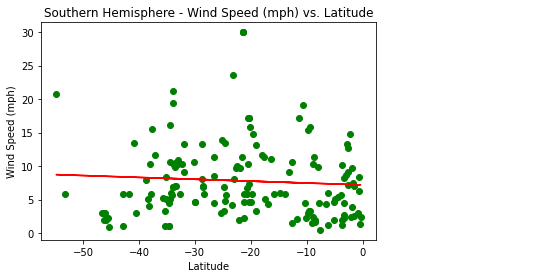

In [25]:
wind = southern_hemisphere["wind"]
lat = southern_hemisphere["lat"]
plt.scatter(x=lat, y=wind, marker = "o", facecolor="green", edgecolors = "green")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
#get the slope, intercept, rvalue, pvalue, and standard error
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#get the correlation
correlation = round(st.pearsonr(lat, wind)[0],2)
r_sq= round(correlation**2,2)
print(f"{line_eq}")
print(f"{correlation}")
print(f"{r_sq}")
#Majority of the cities in southern hemisphere have low wind speed